<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import math
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Задание 1

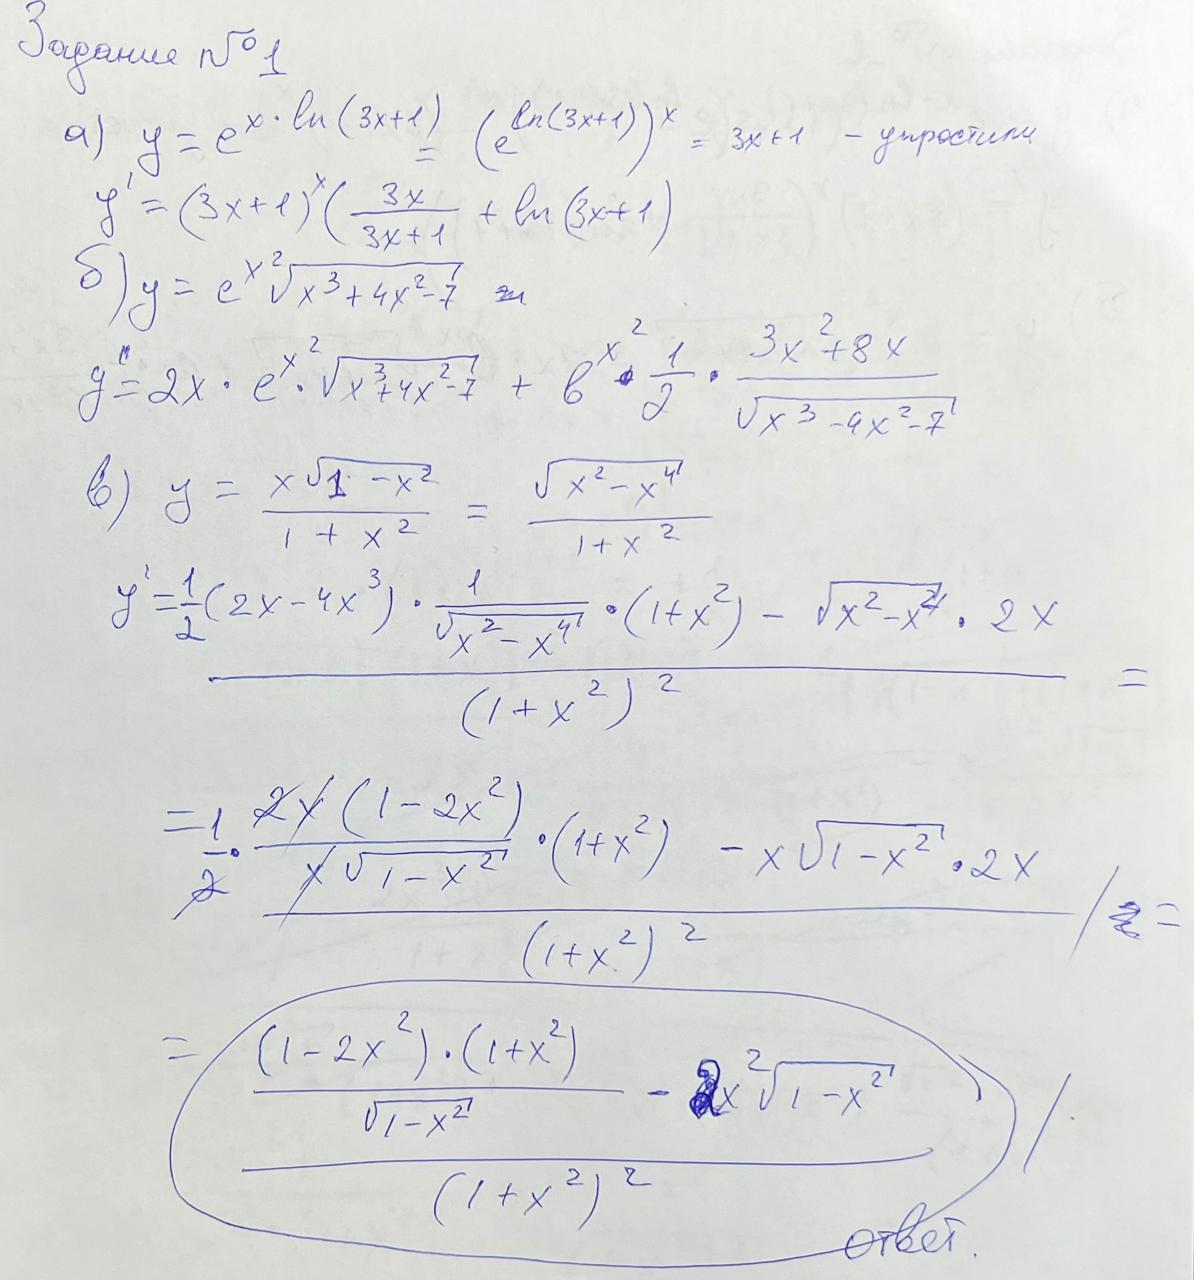

# Задание 2

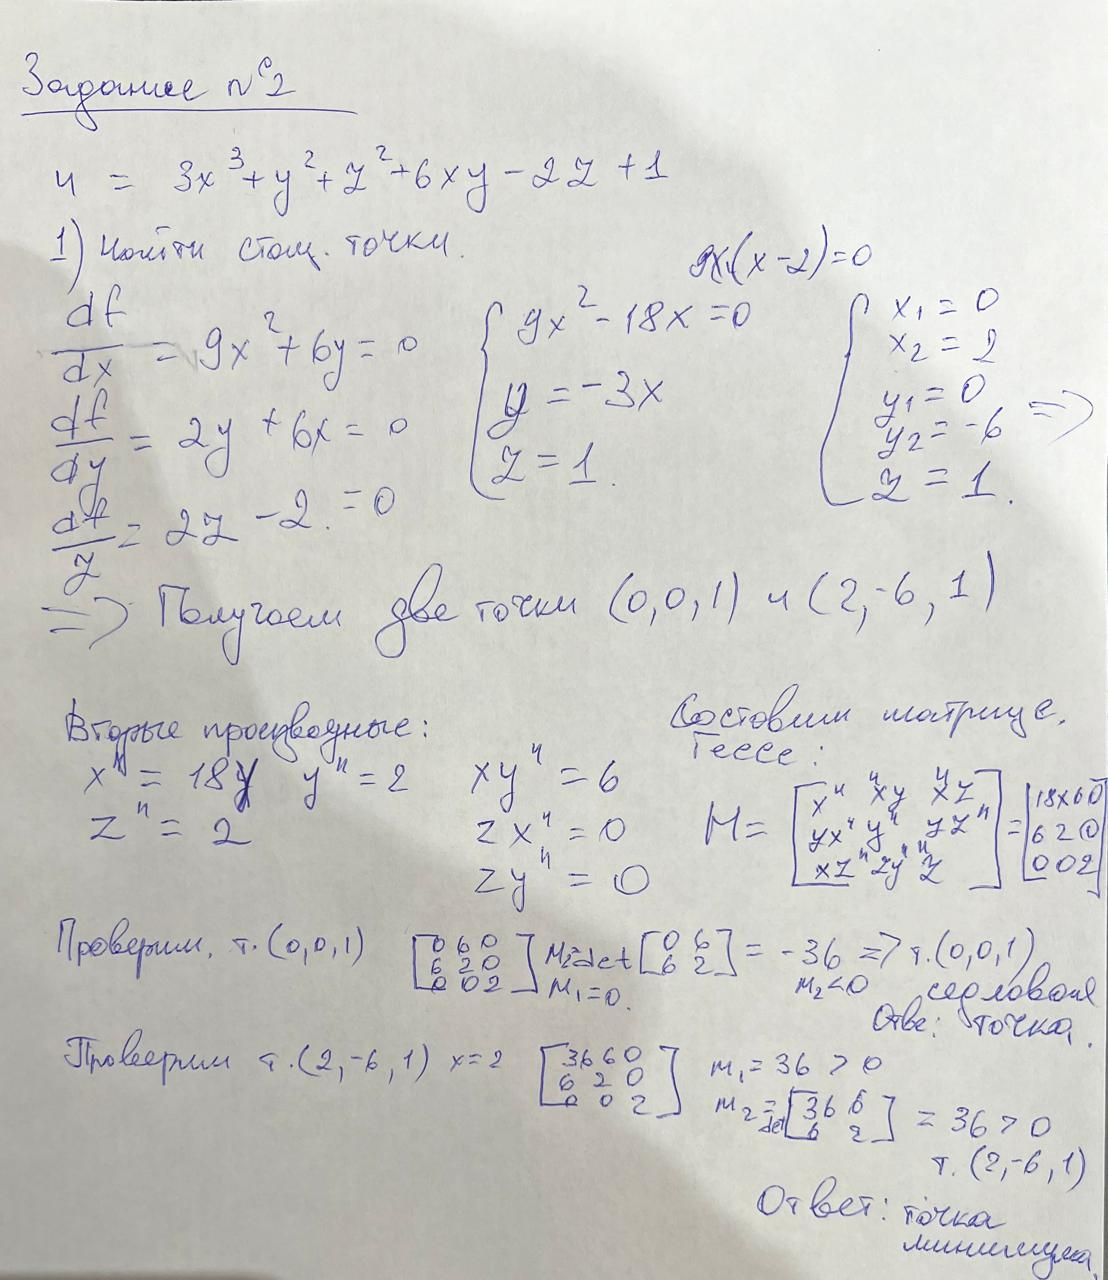

Ответ:
- точка (0,0,1) седловая
- точка (2,-6,1) минимума

# Задание 3

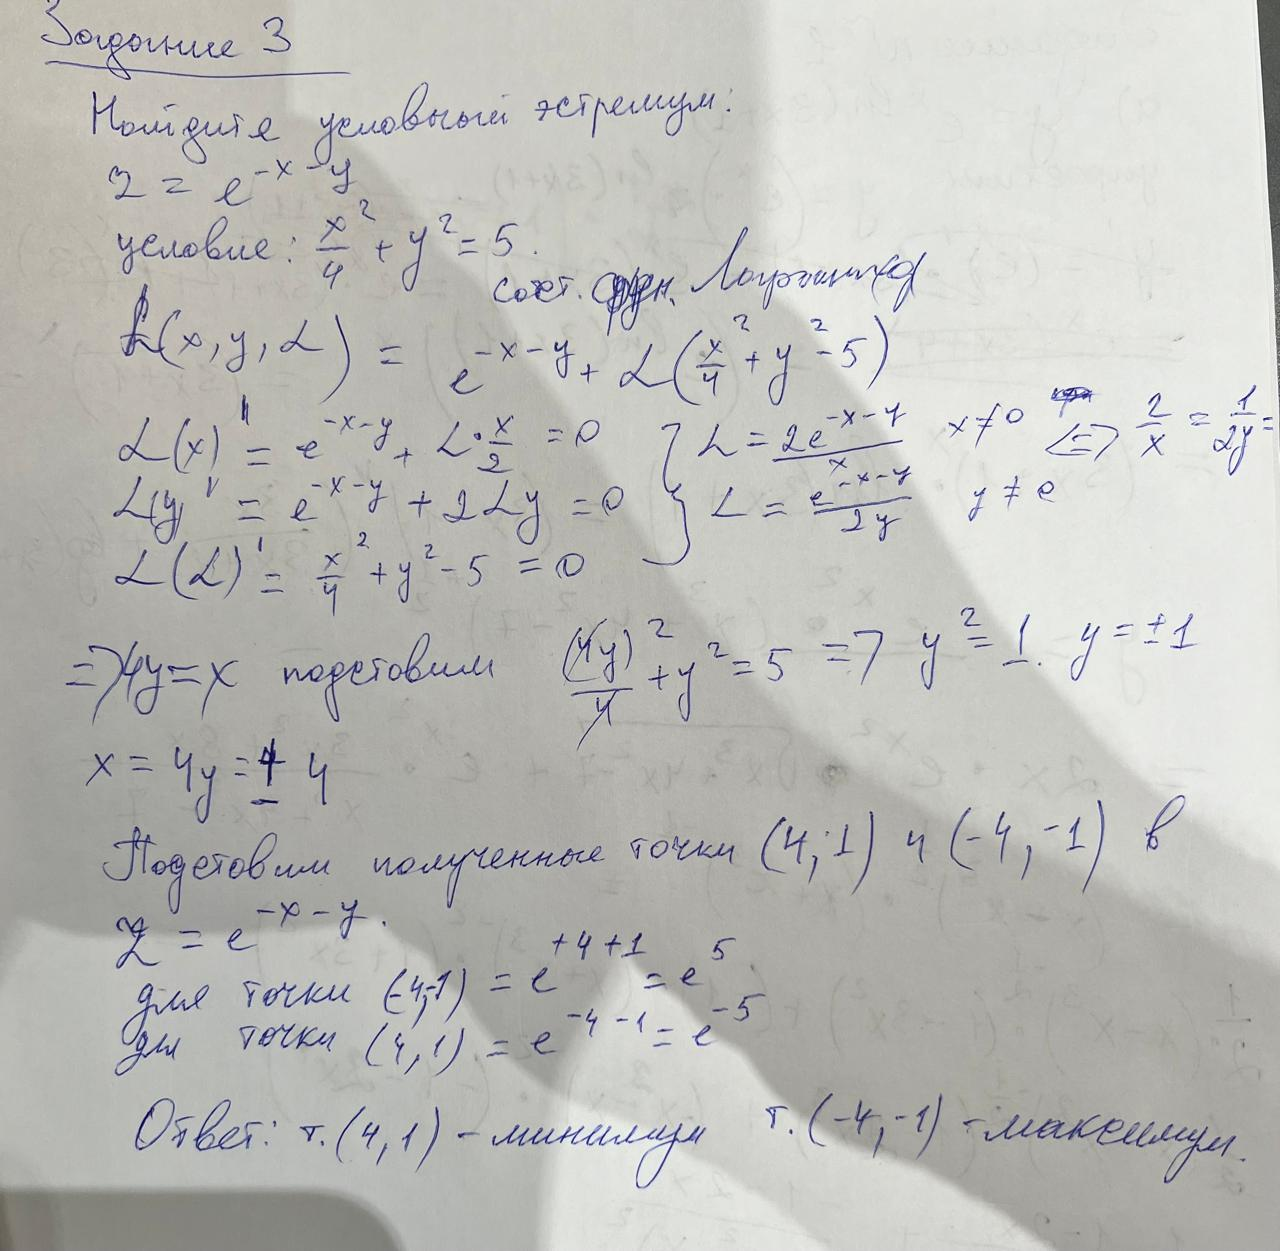

Условный экстремум функции $ z = e^{-x - y} $ при условии $ \frac{x^2}{4} + y^2 = 5 $ достигается в:
- Минимум в точке $ (4, 1) $ с значением $ z = e^{-5} $.

- Максимум в точке $ (-4, -1) $ с значением $ z = e^{5} $.

# Задание 4

In [2]:
# Пример данных
df = pd.read_csv('sf_exam.csv')

# Преобразование категориальных переменных в числовые
df.head()

,Test,Age_Group,Status
0,Positive,Young,Infected
1,Positive,Young,Infected
2,Positive,Young,Infected
3,Positive,Old,Infected
4,Positive,Old,Infected


In [3]:
# Преобразование категориальных переменных в числовые
df['Age_Group'] = df['Age_Group'].astype('category').cat.codes
df['Test'] = df['Test'].astype('category').cat.codes
df['Status'] = df['Status'].astype('category').cat.codes

# Разделение данных на признаки и целевую переменную
X = df[['Age_Group', 'Test']]
y = df['Status']

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Обучение модели Наивного Байеса
model = GaussianNB()
model.fit(X_train, y_train)

# Прогнозирование на тестовой выборке
y_pred = model.predict(X_test)

# Оценка качества модели
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.67
Confusion Matrix:
[[18 25]
 [ 3 38]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.42      0.56        43
           1       0.60      0.93      0.73        41

    accuracy                           0.67        84
   macro avg       0.73      0.67      0.65        84
weighted avg       0.73      0.67      0.64        84



# Задание 5

In [4]:
import numpy as np

def f(x):
    return x**4 + 3*x**3 - 12*x**2 + 7*x - 2

# Первая производная
def f_prime(x):
    return 4*x**3 + 9*x**2 - 24*x + 7

# Вторая производная
def f_double_prime(x):
    return 12*x**2 + 18*x - 24

# Метод Ньютона
def newton_method(x0, tolerance):
    x_n = x0
    while True:
        f_prime_val = f_prime(x_n)
        f_double_prime_val = f_double_prime(x_n)
        
        # Проверка на ноль для второй производной
        if f_double_prime_val == 0:
            print("Вторая производная равна нулю. Метод Ньютона не может быть применен.")
            return None
        
        # Обновление x
        x_n1 = x_n - f_prime_val / f_double_prime_val
        
        # Проверка на сходимость
        if abs(x_n1 - x_n) < tolerance:
            break
        
        x_n = x_n1
    
    return x_n

# Начальная точка и точность
initial_x = 10
tolerance = 0.0001

# Запуск метода Ньютона
optimal_x = newton_method(initial_x, tolerance)
print(f"Оптимальное значение x: {optimal_x}")
print(f"Значение функции в оптимальной точке: {f(optimal_x)}")

Оптимальное значение x: 1.3101483441845974
Значение функции в оптимальной точке: -3.733927973877101


# Задание 6

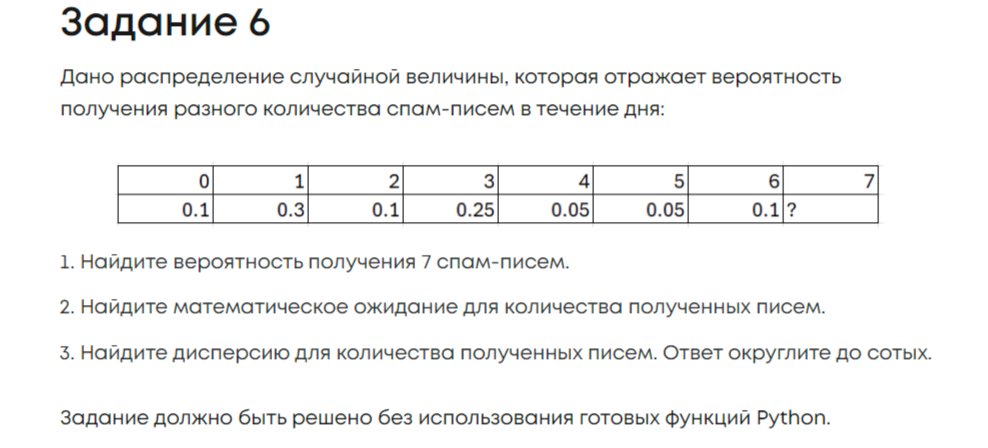

Сумма всех вероятностей случайной величины должна равняться 1, то есть:
$
P(0) + P(1) + P(2) + P(3) + P(4) + P(5) + P(6) + P(7) = 1
$

Известны все вероятности, кроме $ P(7) $.  
Найдём её:
$
P(7) = 1 - (P(0) + P(1) + P(2) + P(3) + P(4) + P(5) + P(6))
$

Подставляем данные:
$
P(7) = 1 - (0.1 + 0.3 + 0.1 + 0.25 + 0.05 + 0.05 + 0.1)
$

Ответ:
$
P(7) = 1 - 0.95 = 0.05
$

In [5]:
# Данные вероятностей
probab = [0.1, 0.3, 0.1, 0.25, 0.05, 0.05, 0.1]

# Вероятность получения 7 спам-писем
sum_probab = sum(probab)
prob_7 = 1 - sum_probab  # Вероятность для 7 писем
probab.append(prob_7)  # Добавим вероятность 7 писем в список

print(f"Вероятность получения 7 спам-писем: {prob_7:.2f}")

# Математическое ожидание
expected_value = 0
for i in range(len(probab)):
    expected_value += i * probab[i]

print(f"Математическое ожидание: {expected_value:.2f}")

# Найдем дисперсию, но сначала найдем E(X^2)
expected_value_squared = 0
for i in range(len(probab)):
    expected_value_squared += (i ** 2) * probab[i]

# Теперь найдем дисперсию
variance = expected_value_squared - (expected_value ** 2)

print(f"Дисперсия: {variance:.2f}")

Вероятность получения 7 спам-писем: 0.05
Математическое ожидание: 2.65
Дисперсия: 4.03


# Задание 7

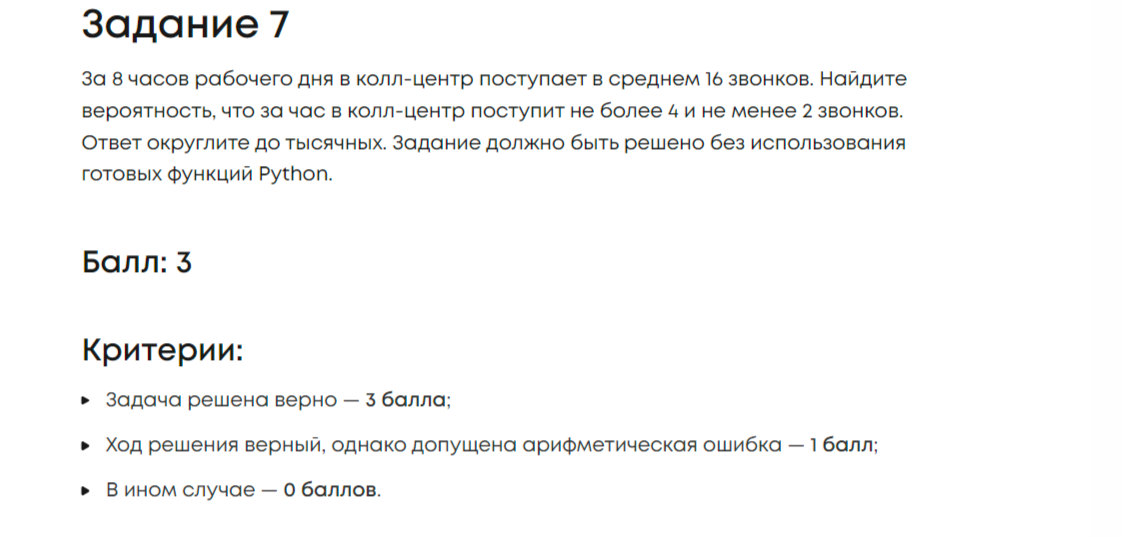

***Формула распределения Пуассона:***

$
P(k; \lambda) = \frac{\lambda^k e^{-\lambda}}{k!}
$
где:

- $ k $ — число событий,
- $ \lambda $ — среднее число событий,


***Дано:***
- Среднее число звонков за 8 часов: 16 звонков
- Среднее число звонков за 1 час: $ \lambda_{1 \text{ч}} = \frac{16}{8} = 2 $.
- Требуется найти вероятность:
$
P(2 \leq k \leq 4) = P(k = 2) + P(k = 3) + P(k = 4)
$

1. Вычислим $ P(k) $ для $ k = 2, 3, 4 $ с использованием формулы Пуассона.
2. Сложим результаты, чтобы найти искомую вероятность.

In [6]:
lambda_ = 2

probabilities = [(lambda_**k * math.exp(-lambda_)) / math.factorial(k) for k in range(2, 5)]

total_probability = sum(probabilities)
print(f' Ответ:  {round(total_probability, 3)}')


 Ответ:  0.541
